# train RTMDet on balloon dataset

- 使用MMDetection算法库，训练 RTMDet 气球目标检测算法，可以适当调参，提交测试集评估指标


In [4]:
import os
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import json

PROJECT_ROOT = "/home/louzekun/projects/mmlab/mmdet"
os.chdir(PROJECT_ROOT)
os.getcwd()

'/mnt/data/ai4phys/louzekun/projects/mmlab/mmdet'

## train

In [2]:
# !python ./tools/train.py ./balloon_RTMDet.py --work-dir ./logs
!cat /home/louzekun/projects/mmlab/mmdet/logs/20230611_133458/20230611_133458.log | tail -16


2023/06/11 13:36:15 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_133458
2023/06/11 13:36:15 - mmengine - INFO - Epoch(train)  [17][2/2]  lr: 4.2308e-03  eta: 0:17:25  time: 1.8476  data_time: 1.5915  memory: 3945  loss: 0.0047  loss_cls: 0.0047  loss_bbox: 0.0000
2023/06/11 13:36:18 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_133458
2023/06/11 13:36:18 - mmengine - INFO - Epoch(train)  [18][2/2]  lr: 4.4872e-03  eta: 0:17:15  time: 1.8359  data_time: 1.5845  memory: 3945  loss: 0.0045  loss_cls: 0.0045  loss_bbox: 0.0000
2023/06/11 13:36:22 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_133458
2023/06/11 13:36:22 - mmengine - INFO - Epoch(train)  [19][2/2]  lr: 4.7436e-03  eta: 0:17:07  time: 1.8284  data_time: 1.5811  memory: 3945  loss: 0.0042  loss_cls: 0.0042  loss_bbox: 0.0000
2023/06/11 13:36:25 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_133458
2023/06/11 13:36:25 - mmengine - INFO - Epoch(train)  [20][2/2]  lr: 5.0000e-03  eta: 0:16:59  time:

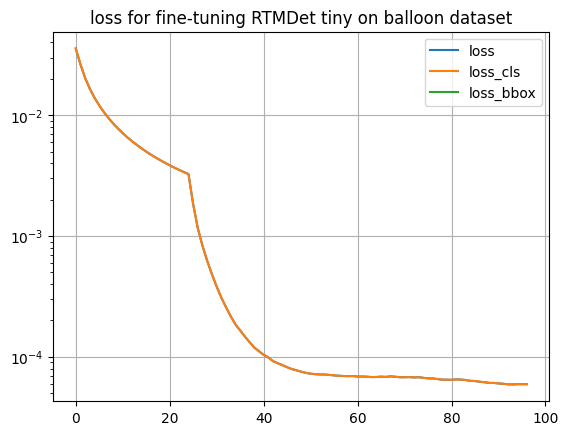

In [7]:
"""
in the log file, we can see the following:
{"lr": 0.0003846615384615385, "data_time": 2.422462582588196, "loss": 0.02636089827865362, "loss_cls": 0.02636089827865362, "loss_bbox": 0.0, "time": 3.296236217021942, "epoch": 2, "memory": 3945, "step": 4}
plot loss against step
"""
log_scalars = "/home/louzekun/projects/mmlab/mmdet/logs/20230611_133458/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

loss = [entry.get('loss') for entry in scalars]
loss = [l for l in loss if l is not None]
loss_cls = [entry.get('loss_cls') for entry in scalars]
loss_cls = [l for l in loss_cls if l is not None]
loss_bbox = [entry.get('loss_bbox') for entry in scalars]
loss_bbox = [l for l in loss_bbox if l is not None]
plt.plot(loss, label='loss')
plt.plot(loss_cls, label='loss_cls')
plt.plot(loss_bbox, label='loss_bbox')
plt.title('loss for fine-tuning RTMDet tiny on balloon dataset')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

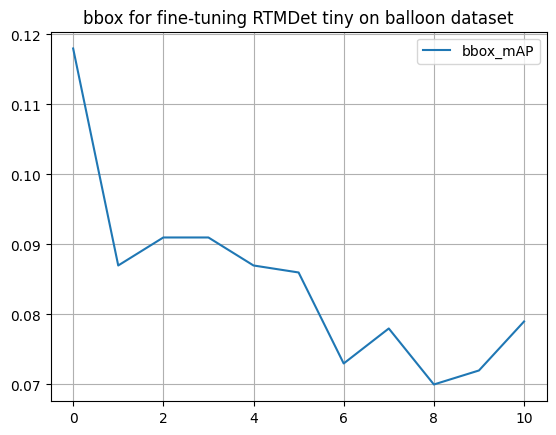

In [8]:
"""
{"coco/bbox_mAP": 0.118, "coco/bbox_mAP_50": 0.143, "coco/bbox_mAP_75": 0.141, "coco/bbox_mAP_s": 0.0, "coco/bbox_mAP_m": 0.014, "coco/bbox_mAP_l": 0.168, "data_time": 0.29770004749298096, "time": 0.33930063247680664, "step": 10}
"""
log_scalars = "/home/louzekun/projects/mmlab/mmdet/logs/20230611_133458/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

bbox_mAP = [entry.get('coco/bbox_mAP') for entry in scalars]
bbox_mAP = [l for l in bbox_mAP if l is not None]
plt.plot(bbox_mAP, label='bbox_mAP')
plt.title('bbox for fine-tuning RTMDet tiny on balloon dataset')
plt.grid()
plt.legend()
# plt.yscale('log')
plt.show()